In [123]:
#library(PROPER)
library(limma)
library(Seurat)
library(ggplot2)
library(Matrix)
library(rhdf5)
library(sva)
library(matrixStats)
#library(qvalue)
#library(fdrtool)
#library(DSS)
#library(DESeq2) 
source("limma-voom.R")

get_categories <- function(meta) {
    names = meta$codes
    for (i in 1:length(meta$categories)) {
        name = meta$categories[i]
        names[meta$codes==(i-1)] = name
    }
    return(names)
}

In [3]:
# remember to change to your own data path
file_path = "/storage10/shuchen/JerberData/alltime_fiaj_12100_5000.mtx"
meta_path = "/storage10/shuchen/JerberData/alltime_fiaj_12100_5000.h5"
h5ls(meta_path)

,group,name,otype,dclass,dim
,<chr>,<chr>,<chr>,<chr>,<chr>
0,/,X,H5I_GROUP,,
1,/X,data,H5I_DATASET,FLOAT,10938528
2,/X,indices,H5I_DATASET,INTEGER,10938528
3,/X,indptr,H5I_DATASET,INTEGER,12101
4,/,layers,H5I_GROUP,,
5,/,obs,H5I_GROUP,,
6,/obs,celltype,H5I_GROUP,,
7,/obs/celltype,categories,H5I_DATASET,STRING,11
8,/obs/celltype,codes,H5I_DATASET,INTEGER,12100


In [34]:
data <- t(readMM(file_path))
cell_type <- h5read(meta_path, name="obs/celltype")
sample_id <- h5read(meta_path, name="obs/sample_id")
pool_id <- h5read(meta_path, name="obs/pool_id")
time_point <- h5read(meta_path, name="obs/time_point")
treatment <- h5read(meta_path, name="obs/treatment")
gene <- h5read(meta_path, name="var/index")

cell_type <- get_categories(cell_type)
sample_id <- get_categories(sample_id)
pool_id <- get_categories(pool_id)
time_point <- get_categories(time_point)
treatment <- get_categories(treatment)

In [54]:
dim(data)

[1]  5000 12100

In [7]:
data_pool <- ComBat(data, pool_id)
data_sample <- ComBat(data, sample_id)

Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




Found 694 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found30batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [149]:
# a metadata dataframe for the variables that we are interested in
meta = data.frame(sample_id=as.factor(sample_id), cell_type=as.factor(cell_type), time_point=as.factor(time_point), treatment=as.factor(treatment))
meta

sample_id,cell_type,time_point,treatment
<fct>,<fct>,<fct>,<fct>
5245STDY7487301,P_FPP,D11,NONE
5245STDY7487301,NB,D11,NONE
5245STDY7487301,FPP,D11,NONE
5245STDY7487301,FPP,D11,NONE
5245STDY7487301,FPP,D11,NONE
5245STDY7487301,NB,D11,NONE
5245STDY7487301,P_FPP,D11,NONE
5245STDY7487301,FPP,D11,NONE
5245STDY7487301,FPP,D11,NONE


In [150]:
# pseudobulk metadata with 200 bulks in total
bulk_meta = unique(meta)
bulk_meta

,sample_id,cell_type,time_point,treatment
,<fct>,<fct>,<fct>,<fct>
1,5245STDY7487301,P_FPP,D11,NONE
2,5245STDY7487301,NB,D11,NONE
3,5245STDY7487301,FPP,D11,NONE
170,5245STDY7487302,FPP,D11,NONE
171,5245STDY7487302,NB,D11,NONE
172,5245STDY7487302,P_FPP,D11,NONE
414,5245STDY7520697,Epen1,D30,NONE
416,5245STDY7520697,FPP,D30,NONE
419,5245STDY7520697,P_FPP,D30,NONE


In [151]:
# Aggregate counts by groups defined by bulk samples
aggr_data <- aggregate(t(data_sample), by = list(meta$sample_id, meta$cell_type, meta$time_point, meta$treatment), FUN = sum)
aggr_data = t(aggr_data[,-c(1:4)])
aggr_data

V1,18.7885507,31.7364318,39.8777546,34.5825286,43.0598255,36.354372,5.7233074,1.9086064,7.2586045,8.5130902,⋯,2.1320065962,1.41700685,0.99217763,7.025615277,0.560340548,0.086934458,1.697434400,0.826858114,0.695346894,0.490154257
V2,13.4573108,22.4084006,38.5592479,36.8061990,35.8635571,36.194583,10.2267868,10.0169835,18.2567131,8.3889204,⋯,1.0306408329,3.50390012,3.34669406,1.873707481,-0.016609896,-0.019745691,0.273258786,0.639775842,-0.052319962,0.547458552
V3,1.8851587,0.8075709,4.1472463,2.0886175,3.1223171,1.832711,1.5252494,0.0000000,0.9557541,0.0000000,⋯,0.0000000000,0.00000000,0.65863670,1.018481900,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
V4,41.3307017,56.2305484,100.7941410,81.5641225,93.4371982,95.459466,11.8259771,11.8139187,8.9527615,3.1795617,⋯,8.0466684572,15.55900907,8.81979944,14.892646584,0.101434363,6.127403472,3.910507163,4.693253810,0.881838646,3.101972339
V5,14.0110096,24.4332011,40.9817044,35.1724839,39.6657874,37.792582,7.2120936,4.0769317,4.0470467,5.9457988,⋯,0.0008225867,0.13884896,-0.20216259,0.152416974,0.020672580,1.607573856,0.833777255,0.627839856,0.569951627,0.070346296
V6,2.7021494,13.8401131,17.5345529,15.5958096,18.2637731,11.464820,5.2822721,0.3448637,3.8694051,2.1397981,⋯,-0.1208909031,0.89075980,1.52635996,0.737956647,0.010768658,0.061470934,0.515598644,-0.013502948,-0.025244969,0.587820053
V7,2.4384647,2.1900359,5.0568327,2.7248977,4.7992702,6.689583,0.8063149,0.7072977,-0.2154914,1.5840666,⋯,0.0667693808,0.97642406,-0.03467732,0.907687357,0.005329245,0.037908321,0.026707752,-0.014023562,-0.004623642,0.011928706
V8,6.4529028,9.6880563,14.3543898,12.4197850,15.7908536,14.125907,1.3707987,1.1515168,0.6048918,2.2903363,⋯,0.0573736313,0.17562637,0.37273699,0.199609203,0.015189393,0.127683047,0.022949453,0.067548604,0.049698265,-0.021762404
V9,5.2871593,7.3973009,15.1491767,10.8193518,11.2874264,10.707829,4.7549659,7.3744464,9.5473221,4.9309773,⋯,5.6672589787,1.50081603,5.11883307,4.053270608,0.005376717,0.039327531,0.039371198,0.039055278,0.659228978,0.047880528
V10,9.9131861,9.9228470,22.6231525,18.7031714,16.9066033,16.455598,0.9790898,1.1561278,3.6773206,0.4899804,⋯,0.0435794555,0.17187248,0.18270214,0.311260116,0.016735734,0.012668180,1.353033195,0.519558050,0.024360285,0.143658515
V11,1.6657156,4.0961828,8.6879660,6.1110240,4.9390571,5.830890,1.0839646,0.2059981,0.2055089,2.7417794,⋯,-0.0868592598,-0.14542057,0.54248476,0.753026151,0.002781330,0.011007091,-0.034743704,0.196306565,-0.019027726,1.463260769


In [57]:
dim(data_pool)

[1]  5000 12100

In [192]:
aggr_data_pos = aggr_data - min(aggr_data)
data_pos = data_sample - min(data_sample)
aggr_data_pos

V1,42.77009,55.71797,63.85929,58.56407,67.04136,60.33591,29.70484,25.89014,31.24014,32.49463,⋯,26.11354,25.39854,24.97371,31.00715,24.54188,24.06847,25.67897,24.80839,24.67688,24.47169
V2,37.43885,46.38994,62.54078,60.78774,59.84509,60.17612,34.20832,33.99852,42.23825,32.37046,⋯,25.01218,27.48544,27.32823,25.85524,23.96493,23.96179,24.25480,24.62131,23.92922,24.52900
V3,25.86670,24.78911,28.12878,26.07015,27.10385,25.81425,25.50679,23.98154,24.93729,23.98154,⋯,23.98154,23.98154,24.64017,25.00002,23.98154,23.98154,23.98154,23.98154,23.98154,23.98154
V4,65.31224,80.21208,124.77568,105.54566,117.41873,119.44100,35.80751,35.79546,32.93430,27.16110,⋯,32.02820,39.54055,32.80134,38.87418,24.08297,30.10894,27.89204,28.67479,24.86338,27.08351
V5,37.99255,48.41474,64.96324,59.15402,63.64732,61.77412,31.19363,28.05847,28.02858,29.92734,⋯,23.98236,24.12039,23.77937,24.13395,24.00221,25.58911,24.81531,24.60938,24.55149,24.05188
V6,26.68369,37.82165,41.51609,39.57735,42.24531,35.44636,29.26381,24.32640,27.85094,26.12133,⋯,23.86065,24.87230,25.50790,24.71949,23.99231,24.04301,24.49714,23.96803,23.95629,24.56936
V7,26.42000,26.17157,29.03837,26.70643,28.78081,30.67112,24.78785,24.68883,23.76605,25.56560,⋯,24.04831,24.95796,23.94686,24.88922,23.98687,24.01944,24.00824,23.96751,23.97691,23.99347
V8,30.43444,33.66959,38.33593,36.40132,39.77239,38.10744,25.35234,25.13305,24.58643,26.27187,⋯,24.03891,24.15716,24.35427,24.18115,23.99673,24.10922,24.00449,24.04909,24.03123,23.95977
V9,29.26870,31.37884,39.13071,34.80089,35.26896,34.68937,28.73650,31.35598,33.52886,28.91251,⋯,29.64880,25.48235,29.10037,28.03481,23.98691,24.02086,24.02091,24.02059,24.64077,24.02942
V10,33.89472,33.90438,46.60469,42.68471,40.88814,40.43713,24.96063,25.13766,27.65886,24.47152,⋯,24.02512,24.15341,24.16424,24.29280,23.99827,23.99420,25.33457,24.50109,24.00590,24.12520
V11,25.64725,28.07772,32.66950,30.09256,28.92059,29.81243,25.06550,24.18753,24.18705,26.72332,⋯,23.89468,23.83612,24.52402,24.73456,23.98432,23.99254,23.94679,24.17784,23.96251,25.44480


In [167]:
# change bulk metadata to characters for future use
bulk_meta <- as.data.frame(lapply(bulk_meta, function(x) as.character(x)))
bulk_meta

sample_id,cell_type,time_point,treatment
<chr>,<chr>,<chr>,<chr>
5245STDY7487301,P_FPP,D11,NONE
5245STDY7487301,NB,D11,NONE
5245STDY7487301,FPP,D11,NONE
5245STDY7487302,FPP,D11,NONE
5245STDY7487302,NB,D11,NONE
5245STDY7487302,P_FPP,D11,NONE
5245STDY7520697,Epen1,D30,NONE
5245STDY7520697,FPP,D30,NONE
5245STDY7520697,P_FPP,D30,NONE


In [216]:
# aggregated data
data_DA <- aggr_data_pos[, which(bulk_meta$time_point=="D52" & bulk_meta$cell_type=="DA")]
meta_DA <- bulk_meta[which(bulk_meta$time_point=="D52" & bulk_meta$cell_type=="DA"),]$treatment
dim(data_DA)
data_nonDA <- aggr_data_pos[, which(bulk_meta$time_point=="D52" & bulk_meta$cell_type!="DA")]
meta_nonDA <- bulk_meta[which(bulk_meta$time_point=="D52" & bulk_meta$cell_type!="DA"),]$treatment
dim(data_nonDA)

[1] 5000   16

[1] 5000  113

In [229]:
# single cell data
data_DA <- data_pos[,which(time_point=="D52" & cell_type=="DA")]
meta_DA <- treatment[which(time_point=="D52" & cell_type=="DA")]
dim(data_DA)
data_nonDA <- data_pos[,which(time_point=="D52" & cell_type!="DA")]
meta_nonDA <- treatment[which(time_point=="D52" & cell_type!="DA")]
dim(data_nonDA)

[1] 5000  434

[1] 5000 6865

In [230]:
# down_sample for non-DA 
set.seed(1234)
nonDA_down = sample(1:ncol(data_nonDA), ncol(data_DA))
data_nonDA <- data_nonDA[,nonDA_down]
meta_nonDA <- meta_nonDA[nonDA_down]
dim(data_nonDA)

[1] 5000  434

In [231]:
res_DA <- DE_limmavoom(counts=data_DA, group=as.factor(meta_DA), contrfml = "groupROT-groupNONE", 
                    cutoff=1.0, thres_type="adjp",
                    p_thres=0.05, lfc_thres=1.0, adj_method = "BH")

[1] "5000 out of 5000 genes left after filtering low-expressed genes"
           Contrasts
Levels      groupROT-groupNONE
  groupNONE                 -1
  groupROT                   1


In [232]:
res_nonDA <- DE_limmavoom(counts=data_nonDA, group=as.factor(meta_nonDA), contrfml = "groupROT-groupNONE", 
                    cutoff=1.0, thres_type="adjp",
                    p_thres=0.05, lfc_thres=1.0, adj_method = "BH")

[1] "5000 out of 5000 genes left after filtering low-expressed genes"
           Contrasts
Levels      groupROT-groupNONE
  groupNONE                 -1
  groupROT                   1


In [224]:
res <- res_nonDA

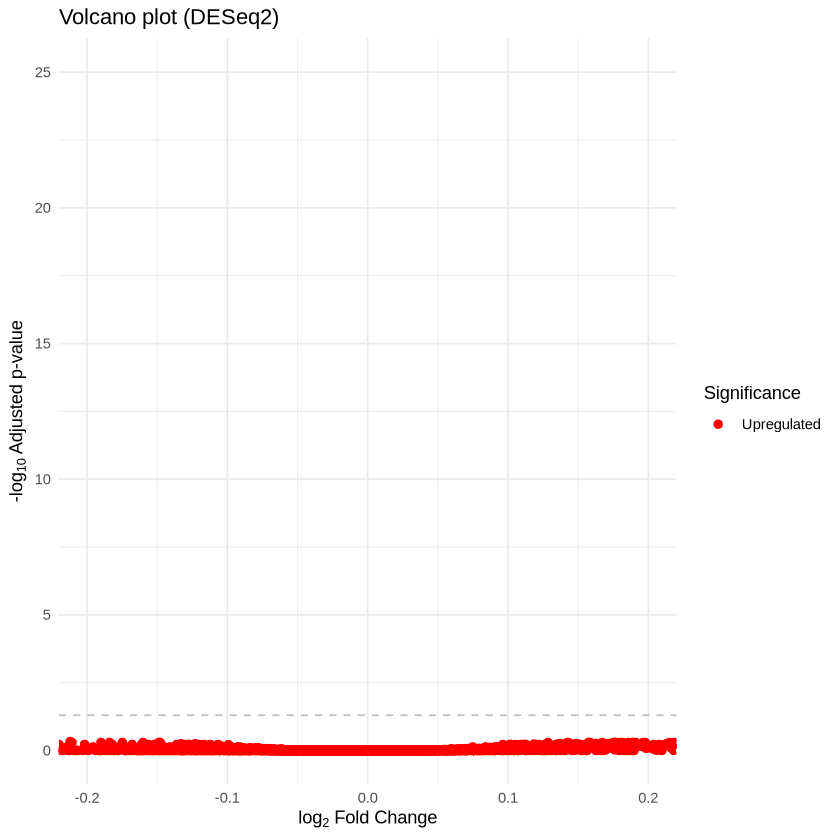

In [225]:
toptable <- res$toptable
toptable$color <- ifelse(toptable$adj.P.Val < 0.05, ifelse(toptable$logFC < 0, "red", "blue"), "grey")
p <- ggplot(data = toptable, aes(x = logFC, y = -log10(adj.P.Val), col = color)) +
    geom_vline(xintercept = c(-0.6, 0.6), col = "grey", linetype = 'dashed') +
    geom_hline(yintercept = -log10(0.05), col = "grey", linetype = 'dashed') +
    geom_point(size = 2) +
    scale_color_manual(values = c("red", "grey", "blue"), 
                       labels = c("Upregulated", "Not significant", "Downregulated")) +
    coord_cartesian(ylim = c(0, 25), xlim = c(-0.2, 0.2)) +
    labs(color = 'Significance',
         x = expression("log"[2]*" Fold Change"),
         y = expression("-log"[10]*" Adjusted p-value")) +
    ggtitle('Volcano plot (DESeq2)') +
    theme_minimal()
p

In [226]:
res$toptable

,logFC,AveExpr,t,P.Value,adj.P.Val,B,genes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
V3961,-0.2120260,7.457989,-4.767564,9.335554e-05,0.4667777,0.5623131,V3961
V4683,0.2256513,7.416583,4.179604,3.912991e-04,0.5041585,-0.4174243,V4683
V1959,0.1910994,7.407389,3.837978,8.986933e-04,0.5041585,-1.0012600,V1959
V234,0.3137229,7.390417,3.824920,9.276149e-04,0.5041585,-1.0493597,V234
V420,0.1857303,7.426459,3.743882,1.128822e-03,0.5041585,-1.1352372,V420
V1937,0.1671053,7.402546,3.736962,1.147879e-03,0.5041585,-1.1790688,V1937
V2531,0.2483888,7.433820,3.725154,1.181131e-03,0.5041585,-1.1397213,V2531
V3627,0.1886029,7.420335,3.703495,1.244618e-03,0.5041585,-1.1863852,V3627
V756,0.2185549,7.486879,3.701128,1.251759e-03,0.5041585,-1.0691893,V756


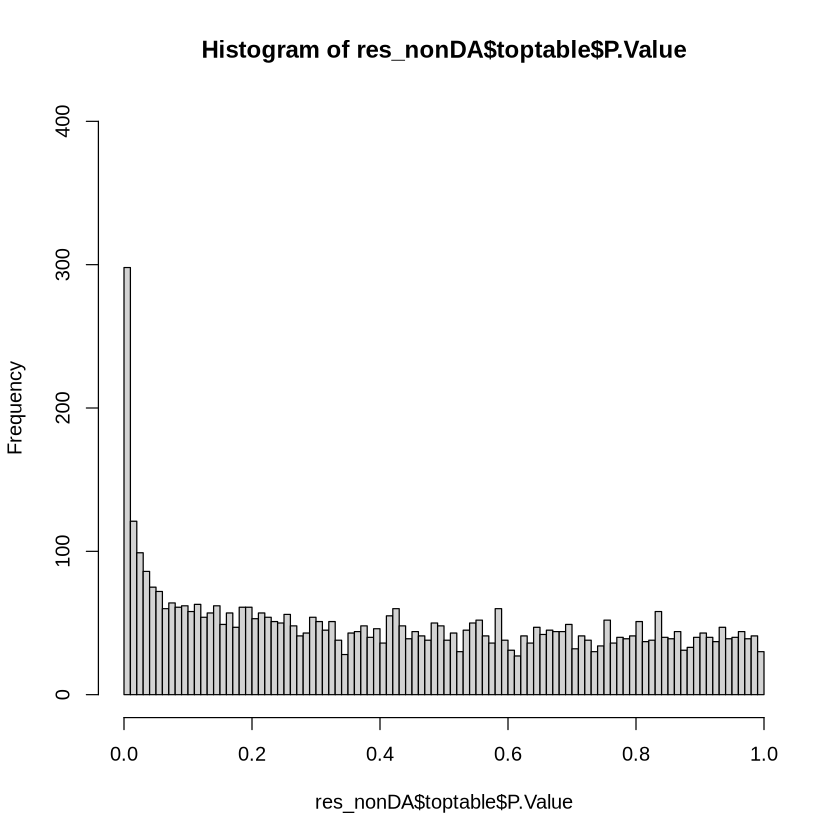

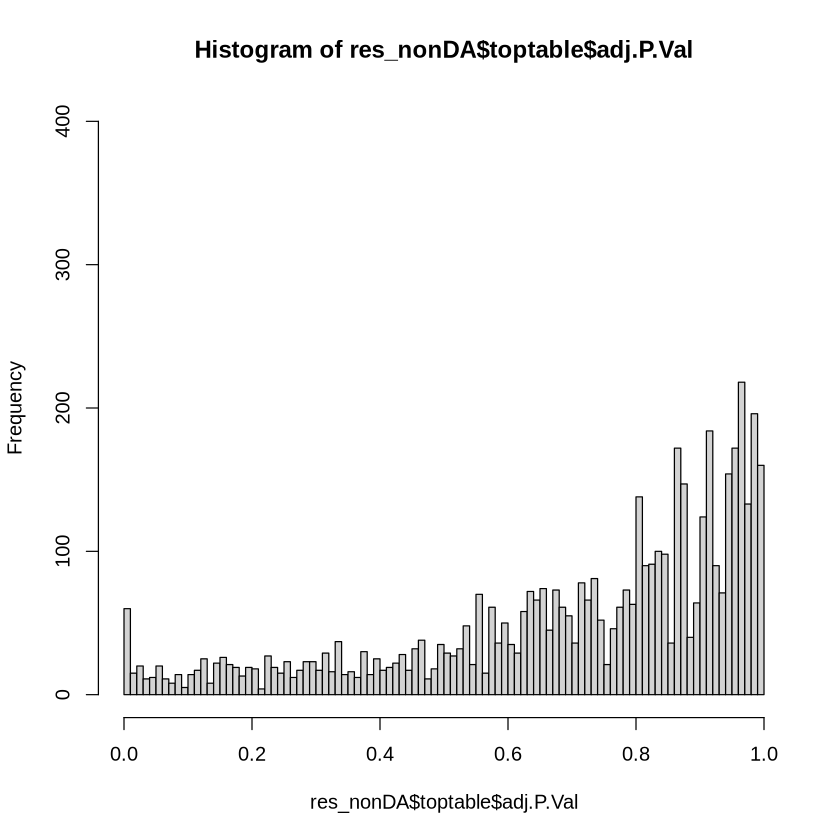

In [236]:
hist(res_nonDA$toptable$P.Value, breaks=100, xlim=c(0.0, 1.0), ylim=c(0, 400))
hist(res_nonDA$toptable$adj.P.Val, breaks=100, xlim=c(0.0, 1.0), ylim=c(0, 400))

In [234]:
sum(res_DA$toptable$adj.P.Val < 0.05)
sum(res_nonDA$toptable$adj.P.Val < 0.05)

[1] 670

[1] 118

In [240]:
length(res_DA$de_genes)
length(res_nonDA$de_genes)

[1] 670

[1] 118

In [ ]:
# complete.results_Cheung <- na.omit(results_Cheung)
res_fdr <- fdrtool(res$toptable$t, statistic = "normal", plot = TRUE)

hist(res$toptable$t, breaks=20)
hist(res_fdr$pval, breaks=20)
hist(res_fdr$lfdr, breaks=20)
hist(res_fdr$qval, breaks=20)

In [ ]:
res$predicted <- ifelse(1:nrow(sim.data$counts) %in% res$de_genes, "DE", "Not DE")
res$actual <- ifelse(1:nrow(sim.data$counts) %in% sim.data$DEid, "DE", "Not DE")
confusion_matrix <- table(res$actual, res$predicted)
sum(res$predicted=="DE")
sum(res$actual=="DE")

metrics <- calculate_metrics(confusion_matrix)
metrics